References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-9-derivatives-of-exponential-and-logarithmic-functions
    
[2] Checkpoint 3.51
$$
\begin{equation}
A(t)=1000e^{0.3t}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, 1000*exp(0.3*x))
x:[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
y:[1000, 1181.36041286565, 1395.61242508609, 1648.72127070013, 1947.73404105468, 2300.97589089282, 2718.28182845905, 3211.27054315356, 3793.66789468318, 4481.68907033806]
f′(x)=300.0*exp(0.3*x)
f′(4)=996.035076820964
y_tangent:[-664.023384547309 -110.670564091218 442.682256364873 996.035076820965
 1549.38789727706 2102.74071773315 2656.09353818924 3209.44635864533
 3762.79917910142 4316.15199955751]


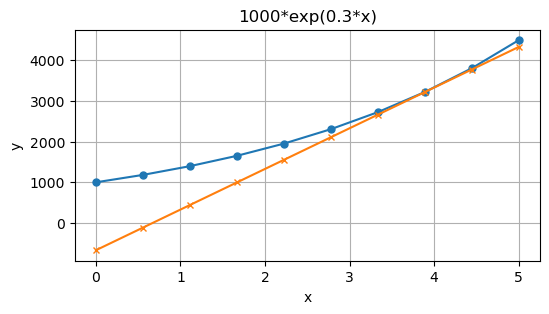

In [3]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, 1000 * sp.exp(0.3 * x))
print(f)

x_values = np.linspace(0, 5, 10)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 4


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()